In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import csv
import os

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension:  PlannerPropMax2tmp


Current folders are:
PlannerPropMax2tmp.0
PlannerPropMax2tmp.1
PlannerPropMax2tmp.2
PlannerPropMax2tmp.3


In [3]:
#display all the rows of the dataframe  
#pd.set_option('display.max_rows', None)

In [4]:
names=["_total_production_","_total_cost_of_production_","_total_cost_of_unused_factors_",
        "_total_inv_goods_revenues_", "_total_cons_goods_revenues_",
       "_total_inv_goods_inventories_","_total_in_progress_inv_goods_inventories_",
       "_total_cons_goods_inventories_","_total_in_progress_cons_goods_inventories_", "_total_lost_production_",
       "_total_cost_of_lost_production_","_updatedLabor_","_updatedCapital_", "_total_grossInvestmentQ_"]

In [5]:
# series database
series={}
for name in names:
    k=0
    #which folder
    os.chdir("../"+folder+"."+str(k))
    #create the dataframe with the content of the folder with extension 0 (k value here)
    #for the 'name' series
    series[name]=pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None)

    for k in range(1,rankNum):   #add the same series from the other folders
        #which folder
        os.chdir("../"+folder+"."+str(k))
        series[name]=series[name].add(pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None))

'_total_production_'

,0,1,2,3,4,5,6,7
0,6278.672270,607.248890,2156.397172,945.073182,595.868343,537.413784,383.501343,292.957075
1,8873.066921,971.280367,3031.454928,1456.348235,1152.790462,1105.214088,724.952335,630.340471
2,8993.569183,1166.265756,3217.958985,1881.196344,1531.405950,1393.951819,1085.035264,960.486899
3,9784.476060,1242.859526,3521.141624,2155.767119,1847.630288,1577.854462,1396.486251,1249.843598
4,9893.819552,1279.443921,3448.137484,2228.933339,2018.164990,1900.309000,1802.473005,1579.228256
...,...,...,...,...,...,...,...,...
259,22191.783032,3876.255233,7472.917175,6783.319873,3480.335076,4533.054335,4957.862233,5809.414370
260,22217.133041,3809.253917,7351.377680,6925.834273,3467.029852,4576.947028,4853.088173,5682.661071
261,22280.329500,3868.674640,7641.808344,6858.044911,3396.555350,4612.921877,4861.299553,5616.047570
262,22199.854973,3860.043585,7645.083875,6837.159534,3487.877105,4569.043029,4846.435326,5686.481237


'____________________________________________________________'

'_total_cost_of_production_'

,0,1,2,3,4,5,6,7
0,24345.194444,2607.027778,5951.361111,2614.083333,1937.000000,1618.305556,1266.666667,931.111111
1,34718.625000,4115.152778,8459.611111,4185.708333,3636.013889,3346.291667,2264.444444,1984.444444
2,35295.416667,4988.277778,8824.736111,5293.430556,4894.236111,4695.569444,3335.555556,2931.111111
3,37775.444444,5450.416667,9609.666667,6000.750000,5726.152778,5264.666667,4282.222222,3780.000000
4,38204.069444,5653.263889,9449.152778,6228.291667,6216.611111,5953.791667,5311.111111,4633.333333
...,...,...,...,...,...,...,...,...
259,81937.930556,16097.250000,20117.152778,18863.027778,10850.097222,14283.305556,14986.666667,17273.333333
260,81955.569444,16081.375000,20305.888889,19071.166667,11249.500000,14279.166667,14506.666667,17288.888889
261,82105.500000,16121.944444,20521.083333,18974.152778,11083.944444,14678.569444,14548.888889,17333.333333
262,82080.805556,16100.777778,20362.333333,18855.972222,11137.750000,14335.041667,14437.777778,16933.333333


'____________________________________________________________'

'_total_cost_of_unused_factors_'

,0,1,2,3,4,5,6,7
0,53600.737496,6120.450469,13063.626618,6884.179163,7977.805738,7920.617610,38304.631784,37059.174217
1,43227.306941,4612.325469,10555.376618,5312.554163,6278.791849,6192.631499,37306.854006,36005.840883
2,42650.515274,3739.200469,10190.251618,4204.831941,5020.569627,4843.353721,36235.742895,35059.174217
3,40170.487496,3277.061580,9405.321062,3497.512497,4188.652960,4274.256499,35289.076228,34210.285328
4,39741.862496,3074.214358,9565.834951,3269.970830,3698.194627,3585.131499,34260.187340,33356.951994
...,...,...,...,...,...,...,...,...
259,14521.708875,1230.883890,4514.785429,1862.356396,1611.509971,5597.455206,7157.918419,17593.248098
260,14516.105990,1228.333716,4298.020830,1757.816615,1234.850544,5604.120960,7644.270788,17593.933559
261,14422.077933,1144.127572,4067.429697,1782.606206,1435.269862,5194.021575,7683.704597,17396.167152
262,14459.873942,1188.822691,4318.695507,1903.478071,1387.865456,5532.710402,7780.360419,17780.246878


'____________________________________________________________'

'_total_inv_goods_revenues_'

,0,1,2,3,4,5,6,7
0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,0.0,2776.587029,0.0,4220.550983,0.0,0.000000,0.0,0.000000
4,0.0,1822.535219,0.0,2278.766254,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
259,0.0,14770.095797,0.0,19460.418899,0.0,8503.901565,0.0,10194.085849
260,0.0,14400.600275,0.0,21116.354873,0.0,12893.431693,0.0,7783.815195
261,0.0,14230.156334,0.0,18318.792038,0.0,12847.892523,0.0,8772.064461
262,0.0,14542.425644,0.0,22688.287655,0.0,14399.521965,0.0,17841.177978


'____________________________________________________________'

'_total_cons_goods_revenues_'

,0,1,2,3,4,5,6,7
0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,42130.033729,0.0,12026.327187,0.0,0.000000,0.0,0.000000,0.0
2,25596.059861,0.0,7167.444914,0.0,0.000000,0.0,0.000000,0.0
3,45327.895984,0.0,13755.614423,0.0,2457.946620,0.0,0.000000,0.0
4,31740.834230,0.0,9329.014897,0.0,2816.314336,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
259,84032.773461,0.0,23558.408437,0.0,11372.809719,0.0,16017.419377,0.0
260,83531.588804,0.0,24943.071914,0.0,6989.351548,0.0,10711.234714,0.0
261,83852.764045,0.0,23842.510928,0.0,9080.767000,0.0,14539.971591,0.0
262,83683.027867,0.0,26312.384916,0.0,10751.471916,0.0,8688.913155,0.0


'____________________________________________________________'

'_total_inv_goods_inventories_'

,0,1,2,3,4,5,6,7
0,0,0.000000,0,0.000000,0,0.000000,0,0.000000
1,0,0.000000,0,0.000000,0,0.000000,0,0.000000
2,0,0.000000,0,0.000000,0,0.000000,0,0.000000
3,0,3166.533333,0,4769.555556,0,0.000000,0,0.000000
4,0,2136.196304,0,2594.410128,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...
259,0,16846.185082,0,22147.857843,0,9659.334517,0,11841.485403
260,0,16410.861508,0,23999.097277,0,14242.599619,0,8580.732887
261,0,16345.033455,0,21002.467404,0,14942.934593,0,9648.473248
262,0,16655.318788,0,26352.594810,0,16702.008737,0,20902.186565


'____________________________________________________________'

'_total_in_progress_inv_goods_inventories_'

,0,1,2,3,4,5,6,7
0,0,2716.388889,0,3237.794444,0,1941.966667,0,1089.111111
1,0,6922.911111,0,7952.316667,0,5887.983333,0,3356.888889
2,0,11857.037500,0,14219.237500,0,10151.866667,0,6846.666667
3,0,13781.793056,0,16200.437500,0,14666.566667,0,11038.444444
4,0,17307.277778,0,21240.573611,0,20864.966667,0,16668.888889
...,...,...,...,...,...,...,...,...
259,0,41615.077778,0,56782.934722,0,84368.766667,0,282201.111111
260,0,41362.841667,0,56622.420833,0,84994.566667,0,285919.111111
261,0,41828.508333,0,58745.790278,0,84564.950000,0,277567.333333
262,0,42115.669444,0,55485.065278,0,81378.833333,0,270856.444444


'____________________________________________________________'

'_total_cons_goods_inventories_'

,0,1,2,3,4,5,6,7
0,0.000000,0,0.000000,0,0.000000,0,0.000000,0
1,48196.500000,0,13634.508333,0,0.000000,0,0.000000,0
2,29287.710716,0,8207.595035,0,0.000000,0,0.000000,0
3,51787.256411,0,15715.705676,0,2771.400000,0,0.000000,0
4,36347.399315,0,10673.702365,0,3213.986714,0,0.000000,0
...,...,...,...,...,...,...,...,...
259,96045.454153,0,27293.870984,0,12510.699996,0,18817.120230,0
260,95328.208471,0,28344.534769,0,7927.323610,0,12783.700853,0
261,95907.661333,0,27079.554521,0,10190.872062,0,16568.910583,0
262,95599.377844,0,30056.621371,0,12339.738395,0,9436.050104,0


'____________________________________________________________'

'_total_in_progress_cons_goods_inventories_'

,0,1,2,3,4,5,6,7
0,25223.611111,0,7324.019444,0,2143.116667,0,1418.444444,0
1,12281.958333,0,3501.495833,0,6287.800000,0,3960.666667,0
2,25217.790278,0,7633.581944,0,11080.633333,0,7652.666667,0
3,15574.609722,0,4590.697222,0,14380.983333,0,12358.666667,0
4,25149.880556,0,7314.847222,0,18299.683333,0,18673.777778,0
...,...,...,...,...,...,...,...,...
259,43714.458333,0,13178.190278,0,29459.783333,0,129188.222222,0
260,44131.618056,0,12419.188889,0,33318.883333,0,131172.888889,0
261,43976.395833,0,13877.572222,0,33145.050000,0,128474.666667,0
262,44090.872222,0,12304.536111,0,32752.683333,0,132828.222222,0


'____________________________________________________________'

'_total_lost_production_'

,0,1,2,3,4,5,6,7
0,386.637965,33.089371,120.588064,47.054242,50.364087,0.000000,62.663362,31.654071
1,716.813369,74.837563,349.369563,213.691742,60.494907,18.571742,107.133374,83.456556
2,633.135669,128.239616,220.079007,178.159026,301.574328,382.355643,174.776986,87.009389
3,753.565122,212.775903,250.548996,304.225975,220.865118,499.227705,230.606382,190.644751
4,608.036481,211.265950,250.846002,290.813382,180.127063,263.845490,160.334215,105.514350
...,...,...,...,...,...,...,...,...
259,1612.551574,662.816045,484.072635,1279.460214,411.371824,1342.958396,1738.032695,2477.681442
260,1655.909810,846.601991,763.326812,1066.673353,792.212332,947.833086,1863.160185,3188.709841
261,1644.235515,654.506794,459.922711,1288.502863,1169.656858,1224.016428,1897.419024,5932.617928
262,1714.946696,636.833919,362.289192,1195.569923,698.705889,1600.896730,1883.514651,2297.670523


'____________________________________________________________'

'_total_cost_of_lost_production_'

,0,1,2,3,4,5,6,7
0,1414.638889,137.583333,317.500000,123.472222,151.069444,0.000000,175.555556,93.333333
1,2467.375000,268.125000,835.194444,510.194444,182.111111,51.138889,282.777778,225.555556
2,2305.208333,445.416667,539.180556,436.263889,759.236111,992.611111,434.444444,230.000000
3,2609.319444,712.944444,616.666667,698.138889,552.125000,1270.055556,573.888889,467.222222
4,2215.486111,742.027778,615.458333,674.402778,443.500000,657.208333,385.000000,255.000000
...,...,...,...,...,...,...,...,...
259,5295.527778,2322.013889,1174.027778,2903.430556,1043.444444,3267.791667,3931.111111,5421.111111
260,5466.888889,2824.902778,1827.388889,2413.555556,2018.430556,2299.958333,4142.222222,7063.333333
261,5410.500000,2292.694444,1097.486111,2915.388889,2904.097222,3022.541667,4277.777778,13013.333333
262,5632.763889,2254.125000,871.083333,2705.972222,1773.222222,3820.166667,4200.000000,5170.000000


'____________________________________________________________'

'_updatedLabor_'

,0,1,2,3,4,5,6,7
0,42560.0,4784.0,9723.0,4880.0,4809.0,4286.0,17619.0,16641.0
1,42560.0,4784.0,9723.0,4880.0,4809.0,4286.0,17619.0,16641.0
2,42560.0,4784.0,9723.0,4880.0,4809.0,4286.0,17619.0,16641.0
3,42560.0,4784.0,9723.0,4880.0,4809.0,4286.0,17619.0,16641.0
4,42560.0,4784.0,9723.0,4880.0,4809.0,4286.0,17619.0,16641.0
...,...,...,...,...,...,...,...,...
259,55744.0,9679.0,13634.0,11493.0,6002.0,9772.0,10172.0,15986.0
260,55776.0,9628.0,13623.0,11415.0,6030.0,9759.0,10259.0,15867.0
261,55742.0,9639.0,13704.0,11408.0,6030.0,9759.0,10259.0,15867.0
262,55742.0,9639.0,13704.0,11408.0,6030.0,9759.0,10259.0,15867.0


'____________________________________________________________'

'_updatedCapital_'

,0,1,2,3,4,5,6,7
0,2.316170e+06,258118.576143,608202.833170,302286.272506,334198.193758,343827.698131,1.436878e+06,1.397408e+06
1,2.316170e+06,258118.576143,608202.833170,302286.272506,334198.193758,343827.698131,1.436878e+06,1.397408e+06
2,2.316170e+06,258118.576143,608202.833170,302286.272506,334198.193758,343827.698131,1.436878e+06,1.397408e+06
3,2.316170e+06,258118.576143,608202.833170,302286.272506,334198.193758,343827.698131,1.436878e+06,1.397408e+06
4,2.316170e+06,258118.576143,608202.833170,302286.272506,334198.193758,343827.698131,1.436878e+06,1.397408e+06
...,...,...,...,...,...,...,...,...
259,2.665811e+06,499464.570471,718030.454295,611082.542086,424299.308320,661829.735548,7.840759e+05,1.236883e+06
260,2.667376e+06,499946.532007,717742.671079,611460.588027,424748.572811,661980.503079,7.837261e+05,1.234636e+06
261,2.670459e+06,500766.576157,718496.433217,612094.928258,425167.557107,661663.771746,7.827800e+05,1.233594e+06
262,2.673022e+06,500856.574783,718724.408498,612143.292391,425358.600758,660998.919403,7.821490e+05,1.233126e+06


'____________________________________________________________'

'_total_grossInvestmentQ_'

,0,1,2,3,4,5,6,7
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
259,1743.392550,326.688160,457.209491,412.463699,390.595732,420.206624,517.094583,851.408477
260,1772.274452,348.721014,414.756038,407.970931,299.757699,419.016816,449.769252,559.912537
261,1907.275297,378.860162,506.520371,430.826645,297.360167,377.841525,396.910575,664.858427
262,1863.232813,314.919258,460.569442,379.489400,277.495913,346.917541,424.152330,714.896651


'____________________________________________________________'

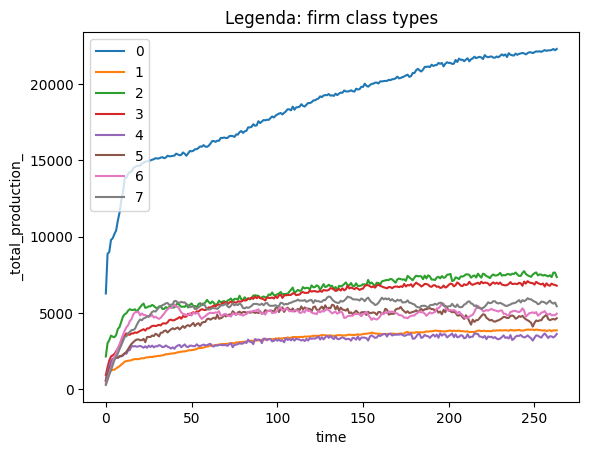

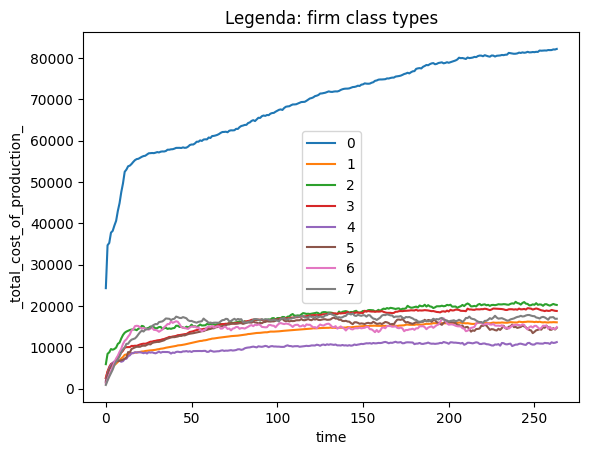

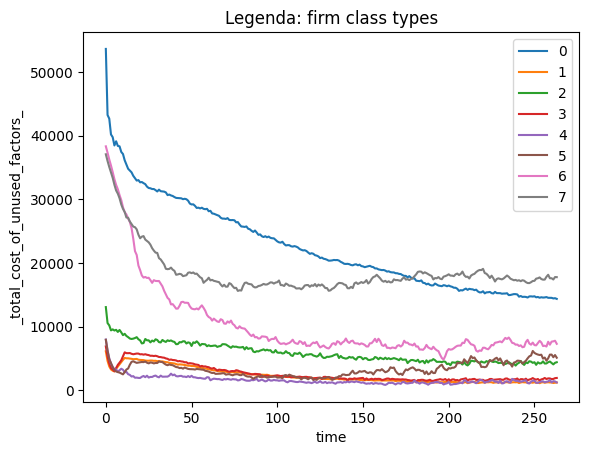

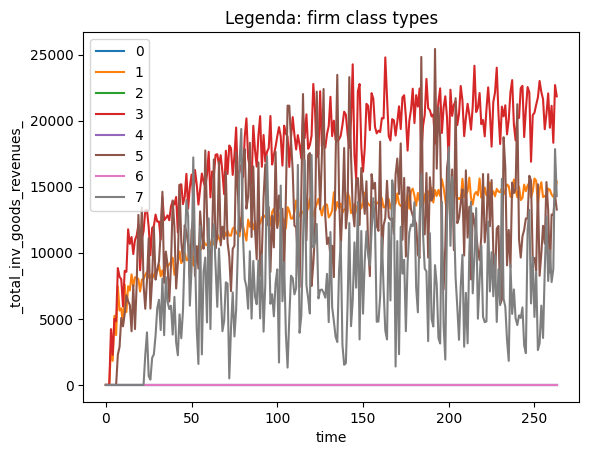

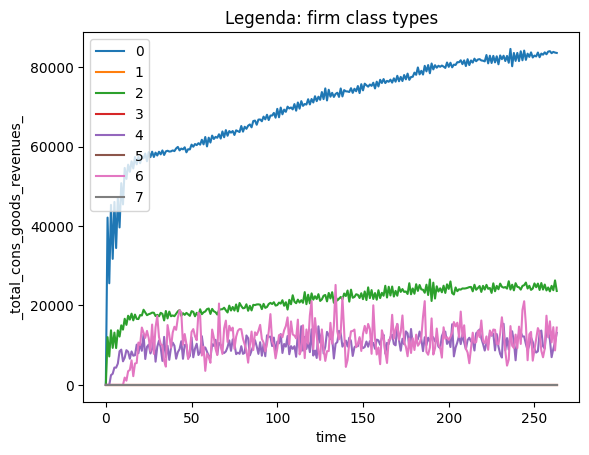

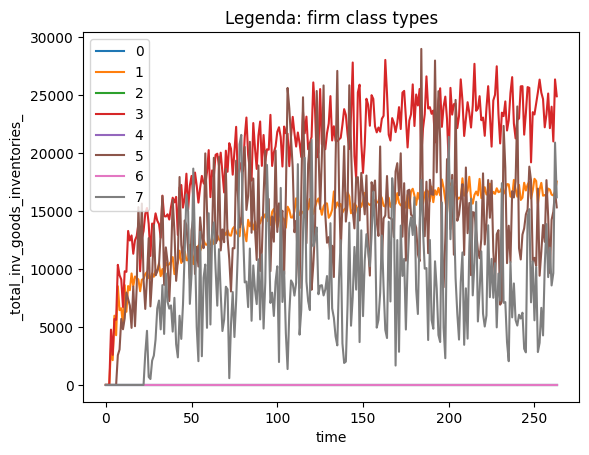

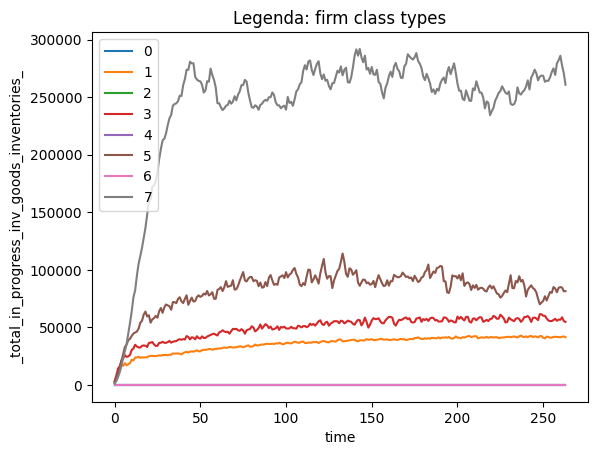

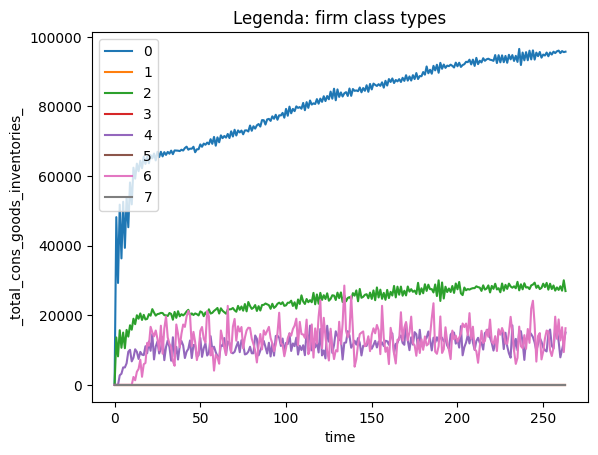

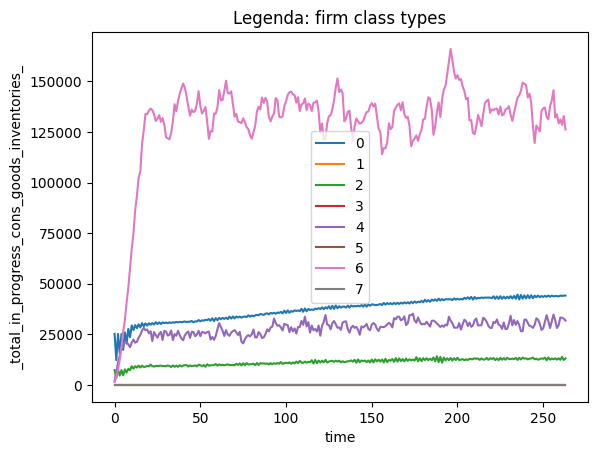

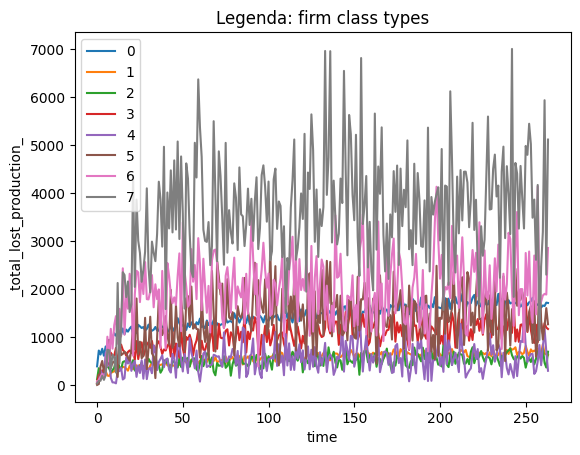

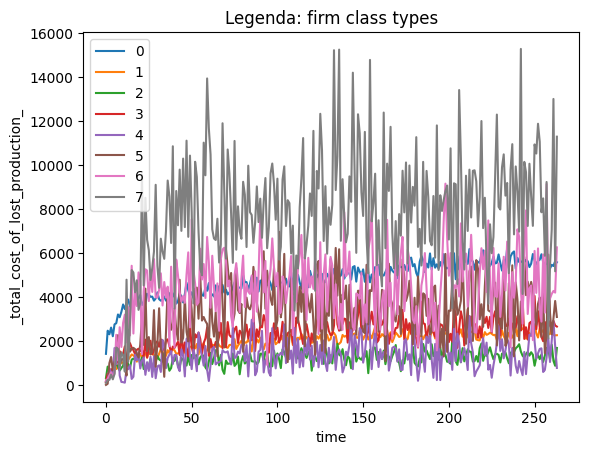

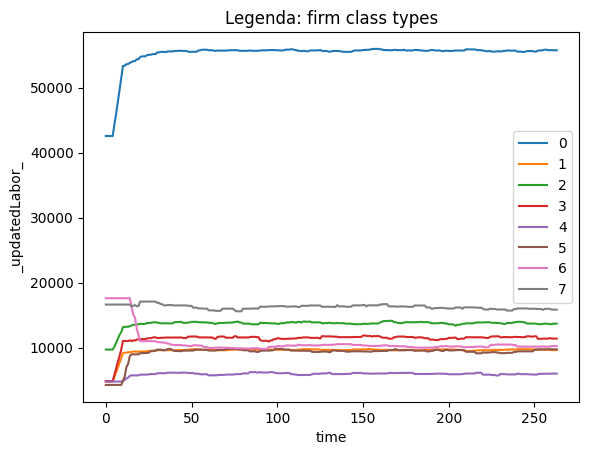

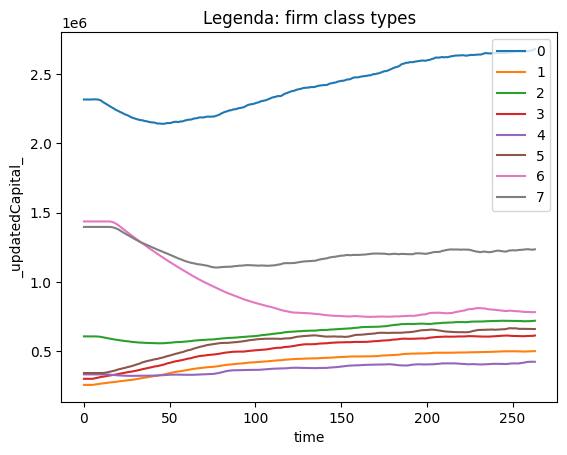

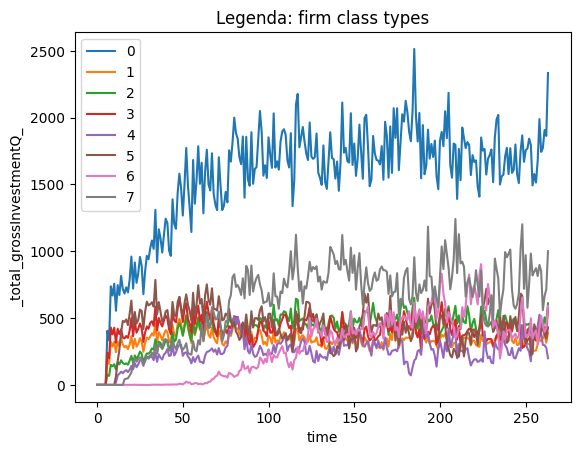

In [6]:
for name in names:
    display(name)
    display(series[name])
    display("____________________________________________________________")
    series[name].plot(title="Legenda: firm class types",xlabel="time",ylabel=name)